ModuleNotFoundError: No module named 'numpy'

In [2]:
%pip install numpy


  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/16/2e/86f24451c2d530c88daf997cb8d6ac622c1d40d19f5a031ed68a4b73a374/numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     --------------------------------- ------ 51.2/61.0 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 61.0/61.0 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
    --------------------------------------- 0.2/15.5 MB 7.6 MB/s eta 0:00:03
   - -------------------------------------- 0.6/15.5 MB 6.0 MB/s eta 0:00:03
   -- ------------------------------------- 0.9/15.5 MB 7.2 MB/s eta 0:00:03
   --- ------------------------------------ 1.3/15.5 MB 6.6 MB/s eta 0:00:03
   --- ------------------------------------ 1.5/15.5 MB 6.9 MB/s eta 0:00:03
   ---- ----------------------------------- 1.9/15.5 MB 6.6 MB/s eta 0:00:03
   ----- ---------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/7d/ca/e7bd1876a341ed8c456095962a582696cac1691cb6e55bd5ead15a755c5d/matplotlib-3.8.4-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/78/38/a046bb0ebce6f530175d434e7364149e338ffe1069ee286ed8ba7f6481ee/contourpy-1.2.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/56/85/0a77382e3dd8528d7f13ee97415c82b36c4879023f226e2b98d012fce077/fonttools-4.51.0-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     ---------------------- ---------------- 92.2/162.8 kB 2.6 MB/s e

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install psutil


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import time
import threading
import matplotlib.pyplot as plt
import psutil

In [6]:
def multiply_matrices(matrix, constant_matrix, result, start, end):
    for i in range(start, end):
        result[i] = np.dot(matrix[i], constant_matrix)

In [11]:
def multiply_with_threads(matrix, constant_matrix, num_threads):
    result = [None] * len(matrix)
    threads = []
    chunk_size = len(matrix) // num_threads

    for i in range(num_threads):
        start = i * chunk_size
        end = start + chunk_size if i < num_threads - 1 else len(matrix)
        thread = threading.Thread(target=multiply_matrices, args=(matrix, constant_matrix, result, start, end))
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()

    return result

if __name__ == "__main__":
    num_matrices = 100
    matrix_size = 1000
    constant_matrix = np.random.rand(matrix_size, matrix_size)
    matrices = [np.random.rand(matrix_size, matrix_size) for _ in range(num_matrices)]

    num_threads_list = [1, 2,3, 4,5,6,7, 8]  # Adjust this list according to your CPU capabilities
    times = []

    for num_threads in num_threads_list:
        start_time = time.time()
        result = multiply_with_threads(matrices, constant_matrix, num_threads)
        end_time = time.time()
        times.append(end_time - start_time)

        print(f"Time taken with {num_threads} threads: {end_time - start_time} seconds")

Time taken with 1 threads: 1.2639505863189697 seconds
Time taken with 2 threads: 0.9028809070587158 seconds
Time taken with 3 threads: 0.950192928314209 seconds
Time taken with 4 threads: 0.9496574401855469 seconds
Time taken with 5 threads: 0.966731071472168 seconds
Time taken with 6 threads: 0.9655108451843262 seconds
Time taken with 7 threads: 0.9695291519165039 seconds
Time taken with 8 threads: 1.015026569366455 seconds


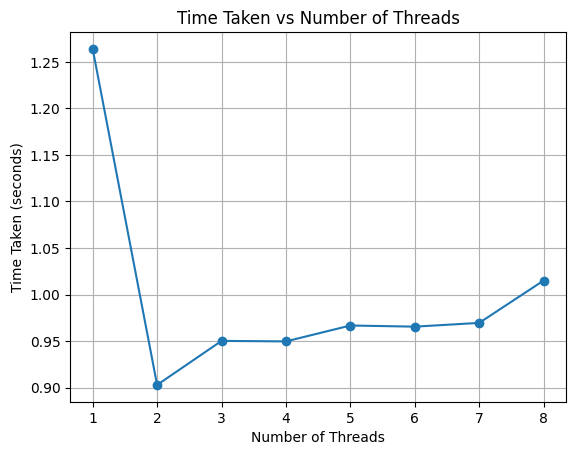

In [12]:
#The graph showing the relation between number of threads and time taken
plt.plot(num_threads_list, times, marker='o')
plt.xlabel('Number of Threads')
plt.ylabel('Time Taken (seconds)')
plt.title('Time Taken vs Number of Threads')
plt.grid(True)
plt.show()

In [13]:
#For monitoring cpu usage
cpu_usage = [psutil.cpu_percent(interval=1) for _ in range(len(num_threads_list))]
print("CPU Usage:", cpu_usage)

CPU Usage: [2.7, 2.7, 2.1, 2.3, 2.1, 1.7, 1.9, 1.9]
